# Theory of the Ising Model
## Ferromagnetism and Paramagnetism
When we think of magnets, the classic refrigerator magnet is probably the first thing to come to mind. Refrigerator magnets are known as ferromagnetic since they are permanently magnetized. However, there are other types of magnetism:

In [4]:
from IPython.display import IFrame

IFrame(src='https://www.youtube.com/embed/u36QpPvEh2c', width='426', height='240')


To summarize, **ferromagnetic** materials are permanent magnets that remain magnetized even after an external magnet is removed, while **paramagnetic** materials are temporary magnets.

*Here's where it gets interesting.* When scientists heated up ferromagnetic materials, they found that the magnetization (how strong a magnet is *after* a magnet is removed) **slowly decreases with temperature,** until it can no longer sustain a permanent magnetic field. In other words, a ferromagnet slowly becomes a paramagnet above a certain temperature. Here's a plot of a ferromagnet's magnetization over time, measured in a real laboratory:


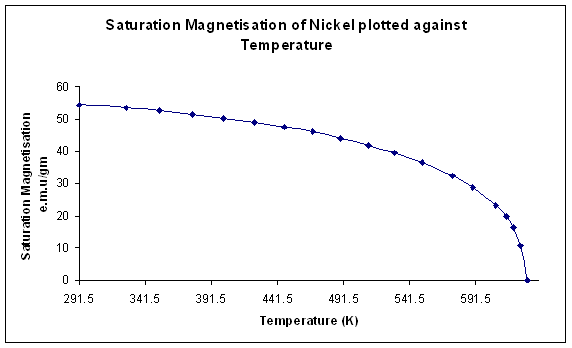

Ideally, scientists would like to determine how magnetization changes with temperature. For example, a space probe operating in high temperatures near the Sun that relies on magnets might require a heat shield in order to keep its magnets operational. However, testing each individual magnetic material requires expensive lab equipment and experience in experimental physics. Enter: the Ising Model.

## The Ising Model

In 1925, **Ernst Ising** discovered a simple model for modeling ferromagnetic and paramagnetic materials. Earlier developments in quantum mechanics showed that electrons set up a magnetic field, which is aligned with the spin of an electron. For the purposes of our model, the electron spin can be either `+1` or `-1`:

<div>
<img src="images/electron_spins.png" width="504"/>
</div>

Every magnetic material has a large number of electrons. Ising theorized that in ferromagnetic materials, the spins of all these electrons stay aligned even after an external magnetic field is removed. This means the magnetic fields of all the electrons add together to make one large magnetic field, magnetizing the material.

<div>
<img src="images/ferromagnetic.png" width="503"/>
</div>

In paramagnetic materials, however, Ising noted that spins start to misalign after an external magnetic field is removed. After a certain period of time (for some materials it can be shorter than one second), the spins from each electron cancel out, since each electron’s magnetic field starts to point in opposite directions. The total sum of every electron’s magnetic field is zero or really close to zero, meaning that the material loses its magnetism.

<div>
<img src="images/paramagnetic.png" width="502"/>
</div>

Why do spins start to misalign in a paramagnetic material, and what does this have to do with temperature? Well, Ising created the Ising Model to figure this out. In the 2D case, we model all of a material's electrons by putting them in a grid, which physicists call a lattice (because the electrons are placed in a regular repeating pattern).

<div>
<img src="images/ising_model_lattice.png" width="501"/>
</div>

Each box in the lattice represents an electron and shows the spin of that electron. The Ising Model states that electrons with a spin that is the same as all of its adjacent neighboring electrons, like the electron highlighted in yellow, have the least energy. Electrons with a spin different from all of their neighbor electrons have the highest energy. This makes sense, since aligning the spins is like taking two bar magnets and putting the North end with the South end, while misaligned spins place two North or two South ends together: the magnets repel each other and increase the energy of the configuration.

<div>
<img src="images/magnet_analogy.png" width="250"/>
</div>

For our entire lattice of electrons, we can write the total energy of our system, as called the Hamiltonian $H$ as:

$$H(x) = - J_{ij}\sum_{<i, j>} \sigma_i \sigma_j$$

where $\sigma_i$ is a spin of electron $i$,  $\sigma_j$ are the spins of neighboring electrons $j$ to electron $i$, and the summation is carried out over all electrons. $J_{ij}$ is what is known as the interaction coefficient between two electrons. It measures how strong the repulsion is between electrons with a different spin, and its an empirical coefficient we used to scale the spin values to the Hamiltonian energy depending on our units. 

- **Quick Remark**

> Notice that if $J_{ij} = 0$ and all the spins are aligned (both are $+1$ or both are $-1$), the product $\sigma_i \sigma_j$ is positive, and the Hamiltonian energy $H$ is negative. However, if the spins are misaligned (one is +1, the other is -1), the product $\sigma_i \sigma_j$ is negative, meaning that the Hamiltonian $H$ is positive. This makes sense according to our earlier explanations, which state that the total energy for aligned spins is lower (negative) compared to misaligned spins (positive).

All electrons want to be aligned with their neighbors to be in the lowest energy configuration so the system has a minimum Hamiltonian (total energy). Otherwise, repulsion from misaligned neighbors would force electron spins to change signs to lower their energy. Why then, do the spins of the paramagnetic materials misalign over time?

Well, the Ising Model theorizes that random thermal fluctuations in the vibration of electrons due to temperature gives certain electrons enough energy to flip the sign of their spin and into a misaligned position. When an electron changes its spin, this is known as a **spin-flip.**

<div>
<img src="images/thermal_energy.png" width="499"/>
</div>

The Boltzmann distribution in statistical mechanics tells us the probability that a spin-flip will happen, which be helpful for simulating the evolution of our magnetic material. For a change in Hamiltonian energy $\Delta H$, the probability of the final configuration with the spin flip given the starting the initial configuration without the spin flip is given by:

$$P(\text{spin flip}) = e^{-k \frac{J}{T} (\Delta H)}$$

> **Note:** Technically, the expression above is the ratio of the probabilities of the final and initial configurations. We're using this probability along with a simplified version of the Metropolis-Hastings Monte Carlo algorithm to optimize our simulation. The Metropolis-Hastings method has been mathematically proven to accurately simulate real-world results.

Do multiple spin flips occur at the same time? Well, it turns out that the thermal energy of a system is usually very low compared to the change in energy it takes for a spin-flip. Thus, it's very unlikely for enough random thermal energy to be concentrated on multiple electrons at any moment. Therefore, we can use an approximation known as **single-spin flip dynamics**, which states that only one spin-flip occurs at any moment. With this simplifying approximation, we can write $\Delta H$ for a single flip from spin $\sigma_i \rightarrow \sigma_i'$. Since our only spin options are $+1$ and $-1$, we know that $\sigma_i = -\sigma_i'$.

$$
\begin{align*}
    \Delta H &= H_{\text{final}} - H_{\text{initial}}\\
    &= \sum_{\langle j \rangle} \sigma_i \sigma_j - \sum_{\langle j \rangle} \sigma_i' \sigma_j \\
    &= (\sigma_i - \sigma_i') \sum_{\langle j \rangle} \sigma_j \\
    &= 2\sigma_i \sum_{\langle j \rangle} \sigma_j
\end{align*}
$$

where the sum over $\langle j \rangle$ is once again over the neighbors of the electron that spin flips from $\sigma_i \rightarrow \sigma_i'$. Plugging this back into our probability expression and taking the natural log to simplify our expression gives:

$$\ln \left(P(\text{spin_flip}) \right) = -2k\frac{J}{T} \sigma_i \sum_{\langle j \rangle} \sigma_j$$

* One more consideration to keep in mind before we head into our simulation:

> Our computers will only be able to simulate small lattice sizes (10 $\times$ 10 in our case) within a reasonable time. We’ll need to somehow simulate extremely large materials with billions of electrons with just a 10 $\times$ 10 lattice. One way to do this is with a **periodic boundary condition (PBC)**, in which electrons on one edge will be neighbors with electrons on the opposite edge of the lattice. Essentially, our lattice repeats itself on the boundaries, and it's as if our lattice was copied and pasted throughout a larger material.

Now, we finally have all theoretical physics in place to write our computer simulation of the Ising Model. Here are some key features of our model:
1. A data structure store the electron spins of all electrons in our lattice. We’ll use a 2D NumPy array.
2. A method to select a random electron spin to flip.
3. A function that calculates the probability of an electron-spin flip occurring, using the Boltzmann distribution and our Hamiltonian expression above. If this probability is greater than one, then the spin will always flip to lower energy. If this probability is less than one, there will be a chance of the spin-flip happening to higher energy due to random thermal fluctuations.
4. A way to calculate the magnetization of the material. This will be calculated by calculating the average spin of the electrons: if the electron spins are aligned, then the average is non-zero and the material is magnetic; otherwise, the average is zero and the material is nonmagnetic.
5. Measuring magnetizations of the materials in repeated trials for a range of temperatures.

Let's get programming!

## Resources
https://stackoverflow.com/questions/51178699/trying-to-display-youtube-video-in-jupyter-notebook